<a href="https://colab.research.google.com/github/the-faisalahmed/Optimization/blob/main/Lights_Out.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import itertools
import copy

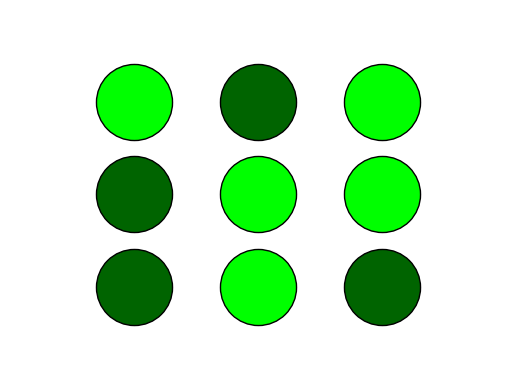

In [72]:
n = 3

# Edit the current lights grid here
current_state = np.array([[1, 0, 1],
                          [0, 1, 1],
                          [0, 1, 0]])

winning_state = np.array([[0, 0, 0],
                          [0, 0, 0],
                          [0, 0, 0]])

size = n*1000

for i in range(n):
  for j in range(n):
    if np.rot90(current_state,3)[i,j] == 1:
     plt.scatter(i,j,marker = 'o',s = size, c = 'lime', edgecolor = 'black');
    else:
     plt.scatter(i,j,marker = 'o',s = size, c = 'darkgreen', edgecolor = 'black');

plt.axis('off')
plt.xlim(-1,3);
plt.ylim(-1,3);
plt.show()

In [73]:
print('For a {0} by {0} grid, there are {1} states.'.format(n, 2**(n*n)))

For a 3 by 3 grid, there are 512 states.


In [74]:
def next_state(state, action):

  this_state = copy.deepcopy(state)
  this_state = eval(this_state)

  this_state[action] = -1 * (this_state[action] - 1 )

  if action in [1,2,4,5,7,8]:
    this_state[action - 1 ] = -1 * (this_state[action - 1] - 1 )
  if action in [0,1,3,4,6,7]:
    this_state[action + 1 ] = -1 * (this_state[action + 1] - 1 )
  if action in [0,1,2,3,4,5]:
    this_state[action + n ] = -1 * (this_state[action + n] - 1 )
  if action in [3,4,5,6,7,8]:
    this_state[action - n ] = -1 * (this_state[action - n] - 1 )
  return str(this_state)


def reward(state, action):

  this_state = copy.deepcopy(state)
  this_state = next_state(this_state,action)
  this_state = eval(this_state)

  if np.array_equal(this_state, np.reshape(winning_state, (n*n,))):
    return 0
  else:
    return -1


In [75]:
possible_states = list(itertools.product([0,1],repeat=9))

q_table = {}

for i in possible_states:
  rewards = []
  for j in list(range(n*n)):
    rewards.append(reward(str(list(i)), j))
  q_table[str(list(i))] = rewards

#q_table

Episode: 0
Episode: 100
Episode: 200
Episode: 300
Episode: 400
Episode: 500
Episode: 600
Episode: 700
Episode: 800
Episode: 900
Episode: 1000
Episode: 1100
Episode: 1200
Episode: 1300
Episode: 1400
Episode: 1500
Episode: 1600
Episode: 1700
Episode: 1800
Episode: 1900
Training finished.



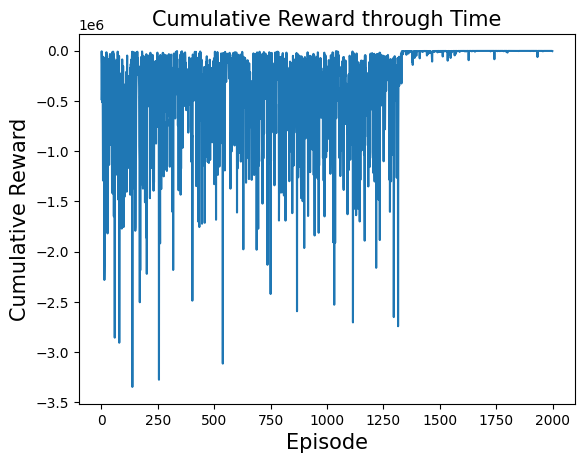

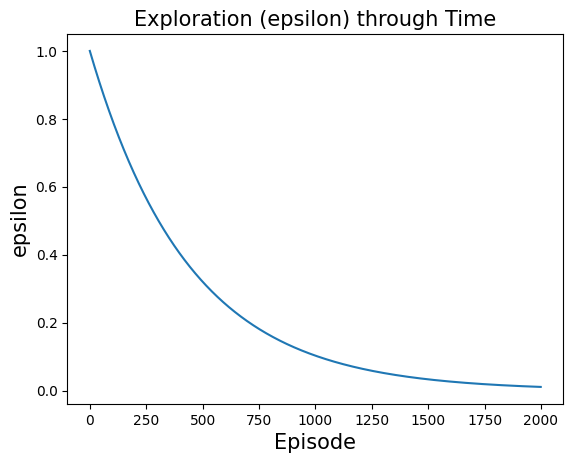

In [78]:
epsilon = 1
gamma = .99
alpha = .99999

# For plotting metrics
cumulative_reward_each_episode = []
epsilon_each_episode = []

# For each episode
maxNumEpisodes = 2000
for i in range(maxNumEpisodes):

  # Reset to initial conditions
  state = str(list(tuple(np.reshape(current_state,(n*n,)))))

  # The variable 'cumulative_reward' will store the sum of the accumulated
  # reward for an entire episode. Set this value to zero at the start of each
  # episode.

  cumulative_reward = 0

  over = False

  pen = 0
  prev_action = []

  # While the episode is not finished
  while not over:

    ##########################################
    # For every time step, using epsilon-greedy to choose between
    # exploration and exploitation.
    # Implement epsilon-greedy exploration.
    # Hint: to return a random action, do this:
    #           action = env.action_space.sample()
    ##########################################

    if np.random.random() > epsilon:
      action = np.argmax(q_table[state])
    else:
      action = random.randint(0,len(q_table[state])-1)

    # Penalizing repeated moves
    if action in prev_action:
     pen = 10
    else:
     pen = 0

    over = np.array_equal(eval(state), np.reshape(winning_state, (n*n,)))

		# Take the action.
		# This moves the agent to a new state and earns a reward

    #current = copy.deepcopy(state_action[state][0])
    new_state = next_state(state, action)

    rewards = q_table[state][action] - pen


    # Add the reward just earned to the cumulative reward variable
    cumulative_reward += rewards

    ##########################################
    # Update your estimate of Q(s,a)
    # Hint: to access a specific value in the q_table, do this:
    #            q_table[state, action]
    ##########################################

    q_table[state][action] = (1-alpha)*q_table[state][action] + \
                                alpha*(rewards + gamma*np.max(q_table[new_state]) - q_table[state][action])

    # Set your state variable to next_state for the next loop.
    state = new_state

    prev_action.append(action)

    # If this episode is finished, take care of a few things:
    if over:
      # Save the cumulative reward from the previous episode to an array.
      cumulative_reward_each_episode.append(cumulative_reward)

      # Save the epsilon used in this episode.
      epsilon_each_episode.append(epsilon)

      ##########################################
      # Decay epsilon,
      # If you want to decay or change the value of epsilon at the end of
      # each episode, do so here.
      ##########################################

      epsilon = epsilon*.997726

  if i % 100 == 0:
    print('Episode: {0}'.format(i))

print("Training finished.\n")

# Plot the Cumulative Reward and Epsilon value through time.
fsize = 15

plt.plot(cumulative_reward_each_episode)
plt.title('Cumulative Reward through Time', fontsize=fsize)
plt.xlabel('Episode', fontsize=fsize)
plt.ylabel('Cumulative Reward', fontsize=fsize)
plt.show()

plt.plot(epsilon_each_episode)
plt.title('Exploration (epsilon) through Time', fontsize=fsize)
plt.xlabel('Episode', fontsize=fsize)
plt.ylabel('epsilon', fontsize=fsize)
plt.show()

In [79]:
over = False

state = str(list(tuple(np.reshape(current_state,(n*n,)))))

finished_run = [np.reshape(eval(state), (n,n))]
moves_made = [None]

while True:

  ##########################################
  # Choose an action based on exploitation.
  ##########################################

  action = np.argmax(q_table[state])

  moves_made.append(action)

  new_state = next_state(state, action)

  state = new_state

  finished_run.append(np.reshape(eval(state), (n,n)))

  over = np.array_equal(eval(state), np.reshape(winning_state, (n*n,)))

  if over:
    break;

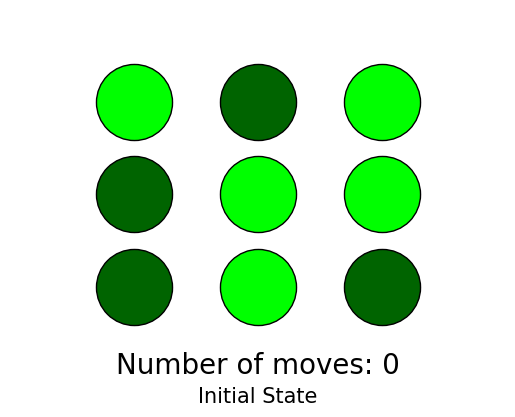

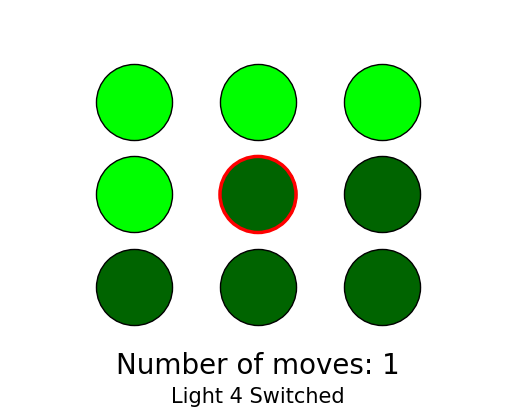

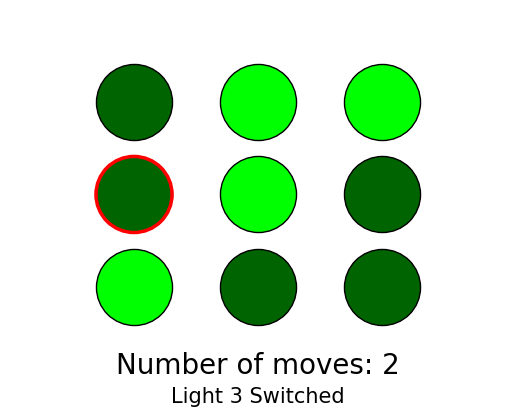

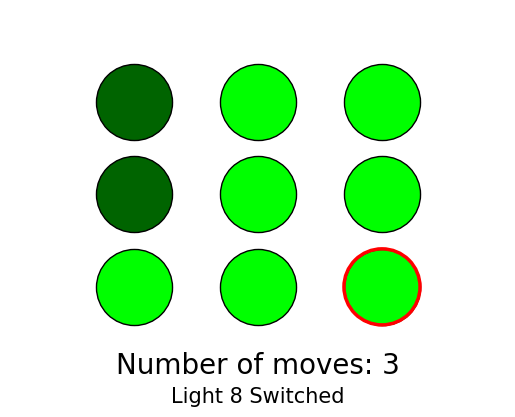

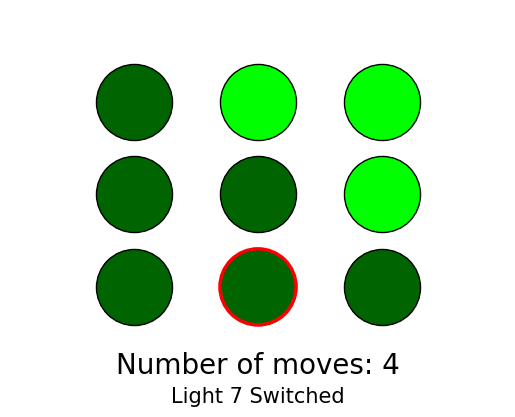

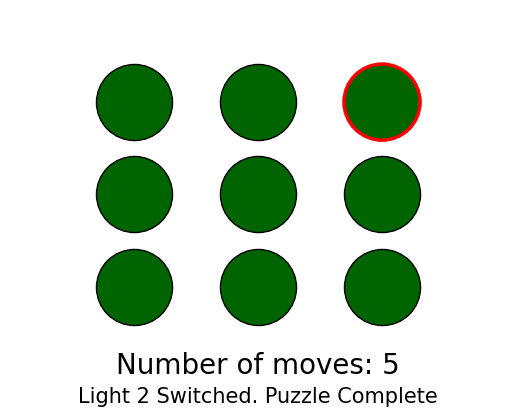

  adding: content/LightsOut3/ (stored 0%)
  adding: content/LightsOut3/LO6_pic.jpg (deflated 16%)
  adding: content/LightsOut3/LO2_pic.jpg (deflated 17%)
  adding: content/LightsOut3/LO3_pic.jpg (deflated 17%)
  adding: content/LightsOut3/LO5_pic.jpg (deflated 17%)
  adding: content/LightsOut3/LO1_pic.jpg (deflated 18%)
  adding: content/LightsOut3/LO4_pic.jpg (deflated 16%)


In [80]:
#!mkdir LightsOut3

move = {}

move = {0: (0,2), 1: (1,2), 2: (2,2),
     3: (0,1), 4: (1,1), 5: (2,1),
     6: (0,0), 7:  (1,0), 8: (2,0)}

count = 0
for x in finished_run:
  for i in range(n):
    for j in range(n):
      if np.rot90(x,3)[i][j] == 1:
        plt.scatter(i,j,marker = 'o',s = size, c = 'lime', edgecolor = 'black');
      else:
        plt.scatter(i,j,marker = 'o',s = size, c = 'darkgreen', edgecolor = 'black');

  plt.text(n-(n-1),-n+(n-1),'Number of moves: {0}'.format(count), horizontalalignment="center",
        verticalalignment="bottom", fontsize = 20)

  if moves_made[count] != None and not np.array_equal(x, finished_run[-1]):
    plt.scatter(move[moves_made[count]][0],move[moves_made[count]][1], alpha = 1, edgecolor = 'red', \
                marker = 'o', facecolors="None", s = size, linewidth = 2.5)
    plt.text(n-(n-1),-n+(n-1)-.3,'Light {0} Switched'.format(moves_made[count]), horizontalalignment="center",
      verticalalignment="bottom", fontsize = 15)
  elif not np.array_equal(x, finished_run[-1]):
    plt.text(n-(n-1),-n+(n-1)-.3,'Initial State', horizontalalignment="center",
      verticalalignment="bottom", fontsize = 15)
  else:
    plt.scatter(move[moves_made[count]][0],move[moves_made[count]][1], alpha = 1, edgecolor = 'red', \
                marker = 'o', facecolors="None", s = size, linewidth = 2.5)
    plt.text(n-(n-1),-n+(n-1)-.3,'Light {0} Switched. Puzzle Complete'.format(moves_made[count]), horizontalalignment="center",
      verticalalignment="bottom", fontsize = 15)


  count+=1
  plt.axis('off')
  plt.xlim(-1,3);
  plt.ylim(-1,3);
  #plt.savefig('/content/LightsOut3/LO%d_%s'%(count,'pic.jpg'))
  plt.show()

#!zip -r /content/LightsOutImages.zip /content/LightsOut3

In [81]:
moves_made

[None, 4, 3, 8, 7, 2]